In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [2]:
def fmt(x):
    s = f"{x:.3e}"
    return(s)

In [3]:
%matplotlib widget

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


In [5]:
f1, f2 = -2.0252226899386, 2.48400518330394
j = 2
a0 = (j/(j+1))**(2./3)
#ep = 0.1
#om1 = 0.0
#om2 = 0.0
#mup = 1e-3

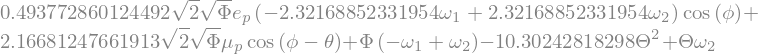

In [6]:
Th, th, Phi, phi, ep, om1, om2 = symbols("Theta theta Phi phi e_p omega_1 omega_2")
mup = symbols("mu_p",positive=True)
H = -Rational(3,2)*j**2/a0**2*Th**2 + om2*Th + (om2-om1)*Phi - (om2-om1)*f2*a0**0.25*ep/f1*sqrt(2*Phi)*cos(phi) - mup*f1/a0**0.25*sqrt(2*Phi)*cos(phi-th)
H

Resonant Hamiltonian $H$

In [7]:
Th0, th0, phi0 = symbols("Theta_0 theta_0 phi_0")
F = -Phi*(th-phi) + Th0*th
F.diff(phi), F.diff(th), solve(F.diff(Th0)-th0,th)[0], solve(F.diff(Phi)-phi0,phi)[0] , solve(F.diff(Th0)-th0,th)[0] 

Conserved quantity is $\Theta_0=\Theta+\Phi$

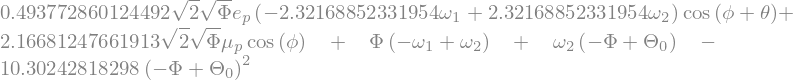

In [8]:
H = H.subs(phi, phi0 + th).subs(Th, Th0 - Phi)
H = H.subs(phi0, phi)  
H

Now new $\phi$ is equal to old $\phi-\theta$, and so new $\theta+\phi$ is old $\phi$

$\theta$ is conjugate to $\Theta_0$ and $\phi$ is conjugate to $\Phi$

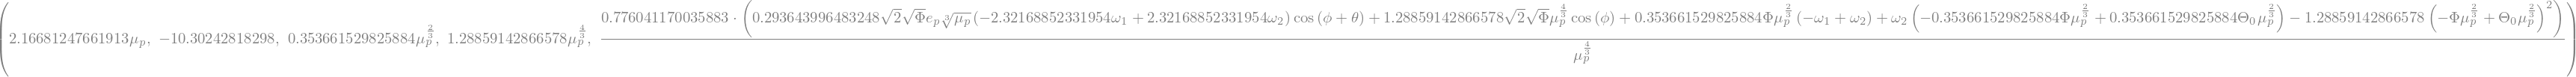

In [9]:
A = H.coeff(sqrt(2 * Phi) * cos(phi))
B = H.coeff((-Phi + Th0) ** 2)
eta = (-A / B) ** Rational(2, 3)
omega = (A*eta**Rational(1,2))
H = H.subs({Phi:Phi*eta,Th0:Th0*eta})/omega
A, B, eta, omega, H

Normalize momenta by $\eta$ and energy by $\omega$

In [10]:
numer, denom = H.as_numer_denom()

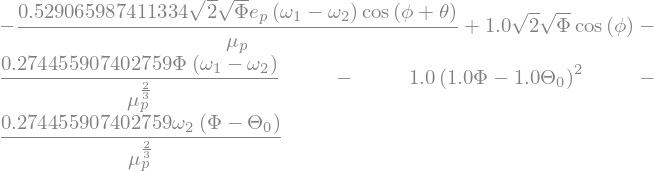

In [11]:
Hadd = 0
for term in numer.args:
    Hadd += (term/denom).cancel().factor()
H = Hadd
H

In [12]:
Hsubs0 = H.subs({ep:0.1,om1:0.0,om2:0.0,mup:1e-3})
Hsubs0

Unperturbed (non-precessing) resonant Hamiltonian

In [13]:
x = symbols("x", positive=True)

In [14]:
H0 = -3

In [15]:
np.flip(np.arange(1,5))

array([4, 3, 2, 1])

In [28]:
H0vals = np.linspace(-10,10,20)
Th0vals = np.arange(-1000,1000)*0.01
Th0sols = np.zeros(len(H0vals))
display((Hsubs0.expand().subs({Phi:x**2,phi:0}).evalf()-H0))
for ii, H0 in enumerate(H0vals):
    print(ii)
    for Th0val in Th0vals:
        pp = []
        for jj in np.flip(np.arange(1,5)):
            pp += [(Hsubs0.expand().subs({Phi:x**2,phi:0,Th0:Th0val}).evalf()-H0).coeff(x**jj)]
        pp += [(Hsubs0.expand().subs({Phi:x**2,phi:0,Th0:Th0val}).evalf()-H0).subs({x:0})]
        rts = np.roots(pp)
        if np.any(rts[np.isreal(rts)]>0):
            Th0sols[ii] = Th0val
            break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [24]:
Th0sols

array([-1.77])

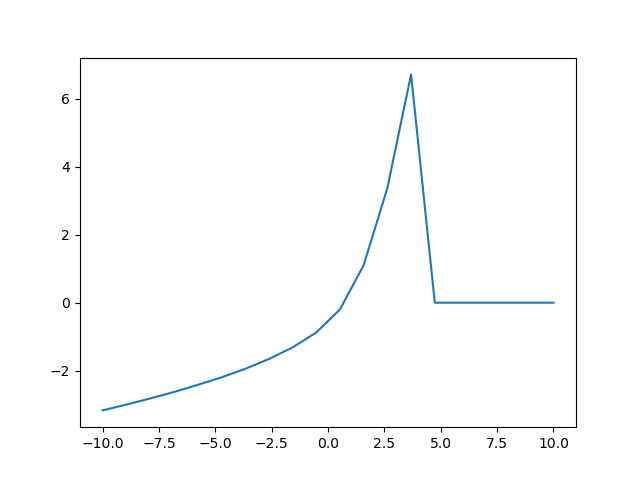

In [29]:
plt.plot(H0vals,Th0sols)

In [26]:
Th0val = 10
H0 = -3
pp = []
for jj in np.flip(np.arange(1,5)):
    pp += [(Hsubs0.expand().subs({Phi:x**2,phi:0,Th0:Th0val}).evalf()-H0).coeff(x**jj)]
pp += [(Hsubs0.expand().subs({Phi:x**2,phi:0,Th0:Th0val}).evalf()-H0).subs({x:0})]
rts = np.roots(pp)
print(rts)

[-3.1503569 +0.19228897j -3.1503569 -0.19228897j  3.58334404+0.j
  2.71736976+0.j        ]


In [39]:
import sympy as sm

/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_28820/859416365.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(np.sqrt(PPhi)*np.cos(pphi),np.sqrt(PPhi)*np.sin(pphi),func(PPhi,pphi))


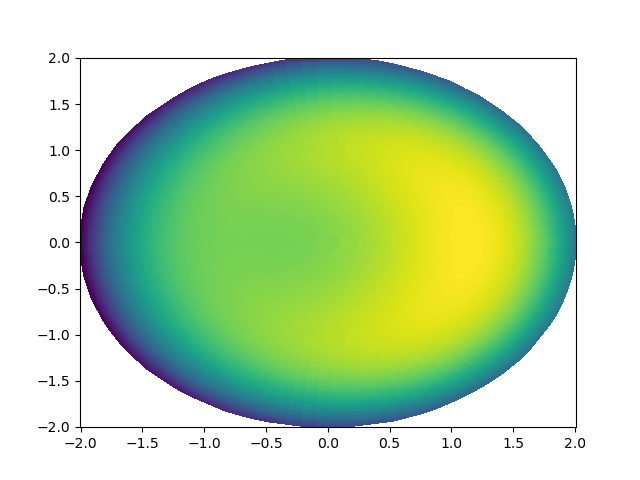

In [56]:
func = lambdify([Phi,phi],Hsubs0.subs(Th0,1))
PPhi,pphi = np.meshgrid(np.linspace(0,4,100),np.linspace(0,2*np.pi,100))
fig, ax = plt.subplots()
ax.pcolormesh(np.sqrt(PPhi)*np.cos(pphi),np.sqrt(PPhi)*np.sin(pphi),func(PPhi,pphi))

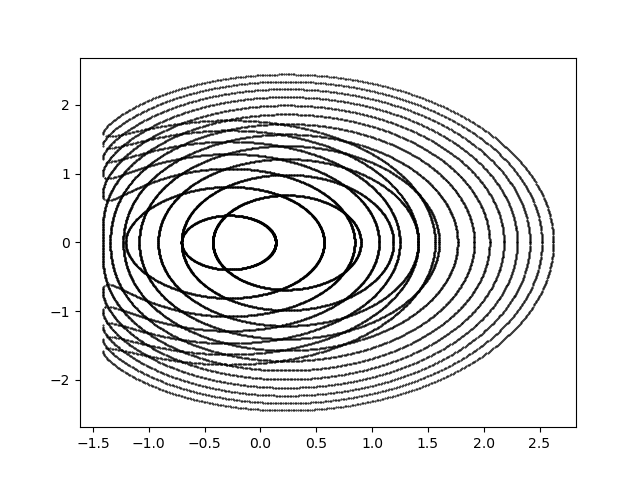

In [36]:
fig, ax = plt.subplots()

H0 = -2
Th0vals = np.arange(-10,10)*.5#[4.584]
phivals = np.linspace(0,2*np.pi,1000)
for Th0val in Th0vals:
    sols = np.zeros((len(phivals),4),dtype=np.complex128)
    for ii, phival in enumerate(phivals):
        poly = Hsubs0.subs({phi:phival,Th0:Th0val,Phi:x**2}).expand().evalf() - H0
        pp = []
        for i in np.flip(np.arange(1,5)):
            pp += [poly.coeff(x**i)]
        pp += [poly.subs({x:0})]
        for jj, root in enumerate(np.roots(pp)):
            # i have no fucking idead why i have to do it like this
            sols[ii,jj] = root

    for ii in range(4):
        X = sols[:,ii][np.isreal(sols[:,ii])] 
        P = phivals[np.isreal(sols[:,ii])][X>0]
        X = X[X>0]
        plt.scatter(X*np.cos(P),X*np.sin(P),s=0.2,c="k")
    #plt.xlim((-2,2)), plt.ylim((-2,2))

In [45]:
phieom_0 = -(Hsubs0.diff(Phi)*sqrt(Phi)).expand().simplify()/2
phieom_0

Critical separatrix value given by depressed cubic $x^3+px+q$

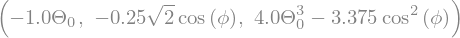

In [46]:
p = phieom_0.coeff(sqrt(Phi))
q = phieom_0.subs({Th0:0,Phi:0})
D = -(4*p**3+27*q**2)
p,q,D

Discriminant $D=-(4p^3-27q^2)$, $D>0\Rightarrow$ 3 real roots, $D<0\Rightarrow$ one real, two imaginary

When $D=0$, $x=-3q/2p$ is double root, $x=3q/p$ is simple root

In [47]:
Th0crit = solve(D.subs(phi,0),Th0)[0]
Phicrit1 = (3*q/p).subs({Th0:Th0crit, phi:pi}).evalf()**2
Phicrit2 = (-3*q/2/p).subs({Th0:Th0crit, phi:pi}).evalf()**2
Th0crit, Phicrit1, Phicrit2

$\Theta_{0,\rm crit}$ is the critical value when the separatrix appears

In [48]:
phieom_0.subs({phi:0,Th0:Th0crit,Phi:Phicrit1}).evalf(), phieom_0.subs({phi:pi,Th0:Th0crit,Phi:Phicrit2}).evalf()

$(\pi,\Phi_{\rm crit,2})$ is the unstable solution where the separatrix appears 

In [49]:
D.subs(phi,pi).subs(Th0,Th0crit+0.1)

$\Theta_0>\Theta_{0,\rm crit}$ have 3 periodic points, two stable, one unstable

In [50]:
Hvalcrit = Hsubs0.subs({Th0:Th0crit,phi:pi,Phi:Phicrit2}).evalf()
Hvalcrit

From here we do the algebra necessary to solve for the separatrix for a given Th0crit value (equal to or above the crit, where it appears).

In [47]:
display(D)
Th0crit = solve(D.subs(phi,0),Th0)[0]*1.
display(Th0crit)
display(phieom_0)

ppp = []
for i in np.flip(np.arange(1,4)):
    ppp += [phieom_0.coeff(Phi**Rational(i,2)).subs(Th0,Th0crit)]
ppp += [phieom_0.subs({Phi:0,phi:0}).evalf()]
print(np.roots(ppp))

ppn = []
for i in np.flip(np.arange(1,4)):
    ppn += [phieom_0.coeff(Phi**Rational(i,2)).subs(Th0,Th0crit)]
ppn += [phieom_0.subs({Phi:0,phi:pi}).evalf()]
print(np.roots(ppn))

[ 1.12246205 -0.56123102 -0.56123103]
[-1.12246205  0.56123103  0.56123102]


In [48]:
Phicrit2 = np.roots(ppp)[1]**2
Phicrit2

what the fuck lol its the 0.756 that gives me the separatrix? (the middle value)

In [49]:
Hvalcrit = Hsubs0.subs({Th0:Th0crit,phi:pi,Phi:Phicrit2}).evalf()
Hvalcrit

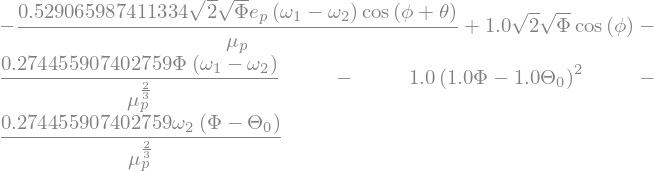

In [39]:
H

In [31]:
x = symbols("x",positive=True)

In [62]:
H0 = Hvalcrit
phivals = np.linspace(0,2*np.pi,1000)
sols = np.zeros((len(phivals),4),dtype=np.complex128)
for ii, phival in enumerate(phivals):
    # unperturbed polynomial (use this for clean separatrix)
    #poly = Hsubs0.subs({phi:phival,Th0:Th0crit,Phi:x**2}).expand().evalf() - Hvalcrit
    # theta+phival=pi
    poly = H.subs({phi:phival,Th0:Th0crit,Phi:x**2,th:pi-phival,om1:0,om2:0.000,mup:6e-6,ep:0.1}).expand().evalf() - H0
    # can look at constant theta
    #poly = H.subs({phi:phival,Th0:Th0crit,Phi:x**2,th:np.pi,om1:0,om2:0.0001,mup:6e-6,ep:0.1}).expand().evalf() - H0
    pp = []
    for i in np.flip(np.arange(1,5)):
        pp += [poly.coeff(x**i)]
    pp += [poly.subs({x:0})]
    for jj, root in enumerate(np.roots(pp)):
        # i have no fucking idead why i have to do it like this
        sols[ii,jj] = root

/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


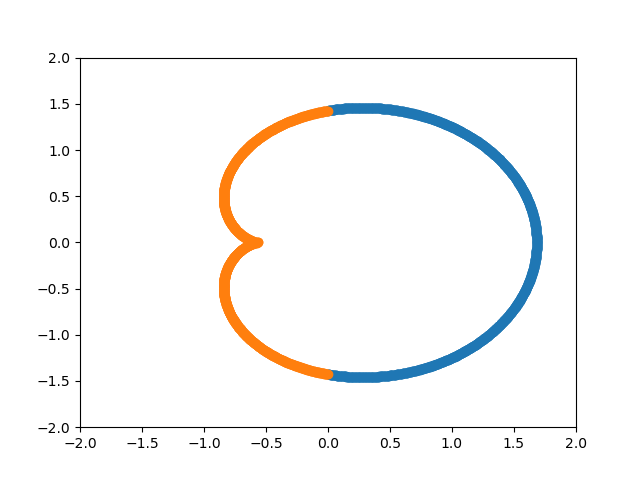

In [63]:
fig, ax = plt.subplots()
for ii in range(4):
    P = phivals[np.isreal(sols[:,ii])]
    X = sols[:,ii][np.isreal(sols[:,ii])] 
    plt.scatter(X*np.cos(P),X*np.sin(P))
plt.xlim((-2,2)), plt.ylim((-2,2))

Success?? Total phase space disruption??

No because you took $\Theta_0$ to be a constant, when in the two critical argument problem, it is not

I think a la Walker & Ford '69 you need to draw other separatrix independently or solve the motion directly?

Lets now look at the other Hamiltonian without the other critical argument

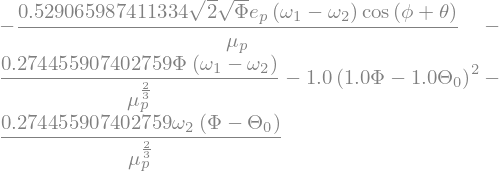

In [51]:
H1 = H.subs(phi,pi/2).subs(th,th-pi/2+phi)
H1

What's up with the different scaling by $\mu_p$?

Could it be the $e_p$ compensates for it?

Already foudn this, $e_p\sim \mu_p^{1/3}$ and $\Delta\omega\sim\mu_p^{2/3}$

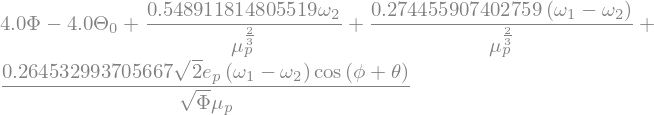

In [54]:
H1.diff(Th0) - H1.diff(Phi)

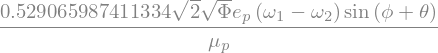

In [55]:
H1.diff(th)

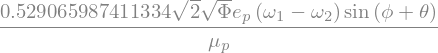

In [56]:
H1.diff(phi)

In [159]:
np.roots(p)

array([ 1.61898342+0.j        , -1.10915889+0.j        ,
       -0.25491226+0.31744143j, -0.25491226-0.31744143j])

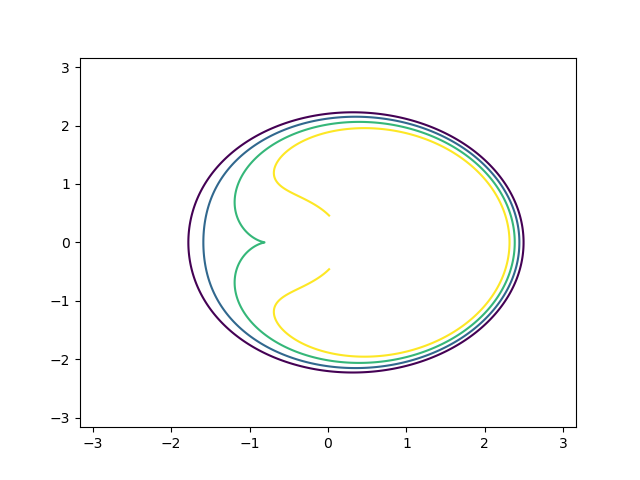

In [118]:
Hfunc = lambdify([phi, Phi], Hsubs.subs({Th0:Th0crit}))
Phivals, phivals = np.meshgrid(np.linspace(0.1, 5, 1000), np.linspace(0, 2 * np.pi, 1000))
fig, ax= plt.subplots()
c = ax.contour(np.sqrt(2*Phivals)*np.cos(phivals),np.sqrt(2*Phivals)*np.sin(phivals),Hfunc(phivals,Phivals),levels=np.arange(-2,2)*0.5+Hval)#,levels=np.arange(-8,8)*0.5)
#ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=10)

In [8]:
solve(H.subs(phi,pi/2).diff(Phi),Phi)

In [12]:
H.subs(Phi,Th0) + 0.5*H.subs(phi,pi/2).diff(Phi).diff(Phi).subs(Phi,Th0)*(Phi-Th0)**2

Set $X_\Theta=\sqrt{2\Theta}\sin(\theta)=0\Rightarrow\theta=0$ (so that $Y_\Theta>0$)

In [13]:
H.diff(Phi)

For single periodic orbit, $\phi=0,\pi$

In [15]:
nsolve(H.diff(Phi).subs(phi,0),Phi)

ValueError: 
expected a one-dimensional and numerical function

In [116]:
def Phi(a, e, ep, dp):
    return (
        np.sqrt(a) * e**2 / 2
        + a**0.25 * f2 / f1 * e * ep * cos(dp) + f2**2 / 2 / f1**2 * ep**2
    )

In [122]:
AA, EE = np.meshgrid(np.linspace(0.5,0.8,100),np.linspace(0,0.3,100))
#plt.contour(AA,EE,Phi(AA,EE,0.1,np.pi))
np.any(Phi(AA,EE,0.01,np.pi)<0)

False